# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [456]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [457]:
print(f"col names: {[column for column in df_tesla.columns]}, rows, columns: {df_tesla.shape}")

col names: ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], rows, columns: (124, 3)


In [458]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [459]:
# use the .describe() method to get a summary of the data
print(df_tesla.describe())


       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007


### Unemployment Data

In [460]:
print(f"col names: {[column for column in df_unemployment.columns]}, rows, columns: {df_unemployment.shape}")

col names: ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], rows, columns: (181, 3)


In [461]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [462]:
print(f"col names: {[column for column in df_btc_search.columns]}, rows, columns: {df_btc_search.shape}")

col names: ['MONTH', 'BTC_NEWS_SEARCH'], rows, columns: (73, 2)


In [463]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [464]:
print(f'Missing values for Tesla?: \n{df_tesla.isnull().sum()}\n')
print(f'Missing values for U/E?: \n{df_unemployment.isnull().sum()}\n')
print(f'Missing values for BTC Search?: \n{df_btc_search.isnull().sum()}')

Missing values for Tesla?: 
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Missing values for U/E?: 
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

Missing values for BTC Search?: 
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64


In [465]:
print(f'Missing values for BTC price?: \n{df_btc_price.isna().values.any()}')

Missing values for BTC price?: 
True


In [466]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [467]:
# remove any missing values
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [468]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [469]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 0


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [470]:
# use .resample() for the beginning of the month
df_btc_price_monthly = df_btc_price.resample('MS', on='DATE').last()
df_btc_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-01,386.944000,34707300.0
2014-10-01,338.321014,12545400.0
2014-11-01,378.046997,9194440.0
2014-12-01,320.192993,13942900.0
2015-01-01,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [471]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_format = mdates.DateFormatter("'%y|%m") # adjust the year format to be 'YY|MM


In [472]:
# Register date converters to avoid warning messages
# if the code gives problems, follow what the error message tells you to do

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Add tick formatting for dates on the x-axis.
9. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

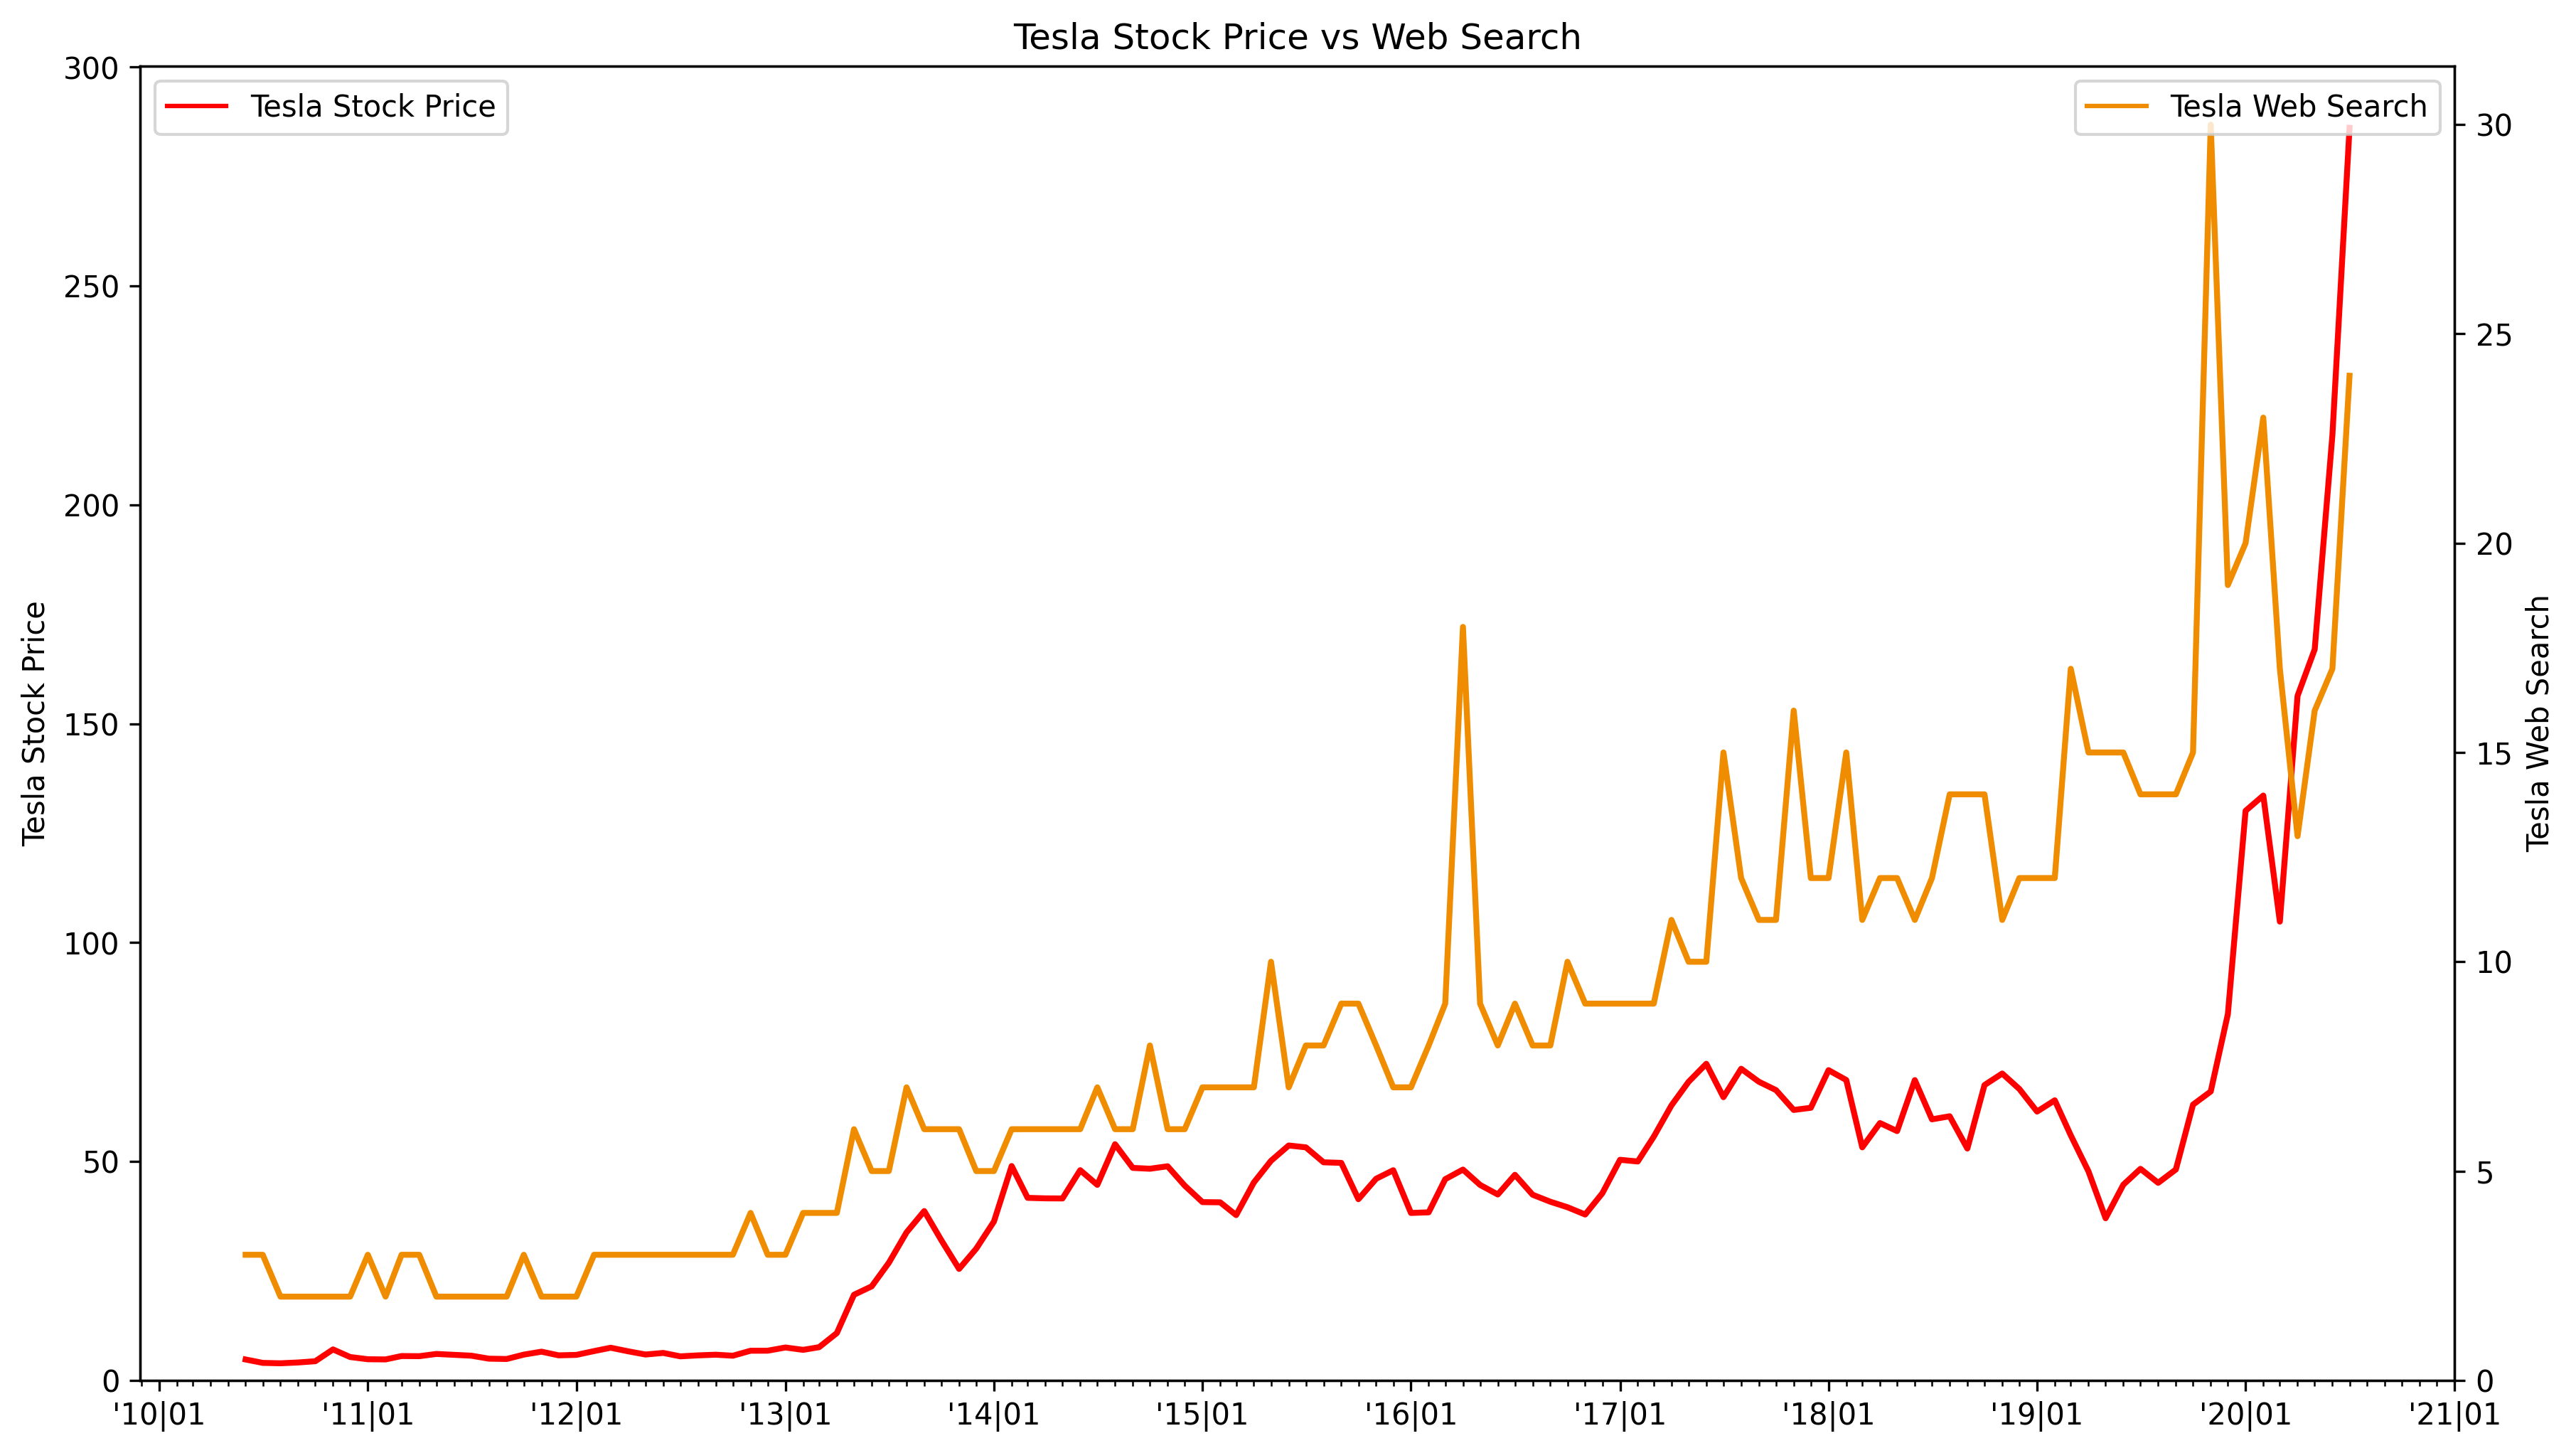

In [473]:
# give the plot more dpi
plt.figure(figsize=(14,8), dpi=300)
ax1 = plt.gca() # get the current axis object
ax1.set_title('Tesla Stock Price vs Web Search') # set a title for the plot
ax2 = ax1.twinx()
ax1.set_ylabel('Tesla Stock Price')
ax2.set_ylabel('Tesla Web Search')
# rotate by 45 degrees the dates
# ax1.tick_params(axis='x', rotation=45)
ax1.plot(df_tesla[:-2].MONTH, df_tesla[:-2].TSLA_USD_CLOSE, color='#FF0000', label='Tesla Stock Price')
ax2.plot(df_tesla[:-2].MONTH, df_tesla[:-2].TSLA_WEB_SEARCH, color='#F08C00', label='Tesla Web Search')
# set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# set the y limits to 0
ax1.set_ylim(0)
ax2.set_ylim(0)
# change thickness of the lines on the plot
ax1.lines[0].set_linewidth(2)
ax2.lines[0].set_linewidth(2)
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_locator(months)
# show the plot
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [474]:
print(df_btc_price_monthly.head())
print(df_btc_search.head())

                 CLOSE      VOLUME
DATE                              
2014-09-01  386.944000  34707300.0
2014-10-01  338.321014  12545400.0
2014-11-01  378.046997   9194440.0
2014-12-01  320.192993  13942900.0
2015-01-01  217.464005  23348200.0
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
3 2014-12-01                4
4 2015-01-01                5


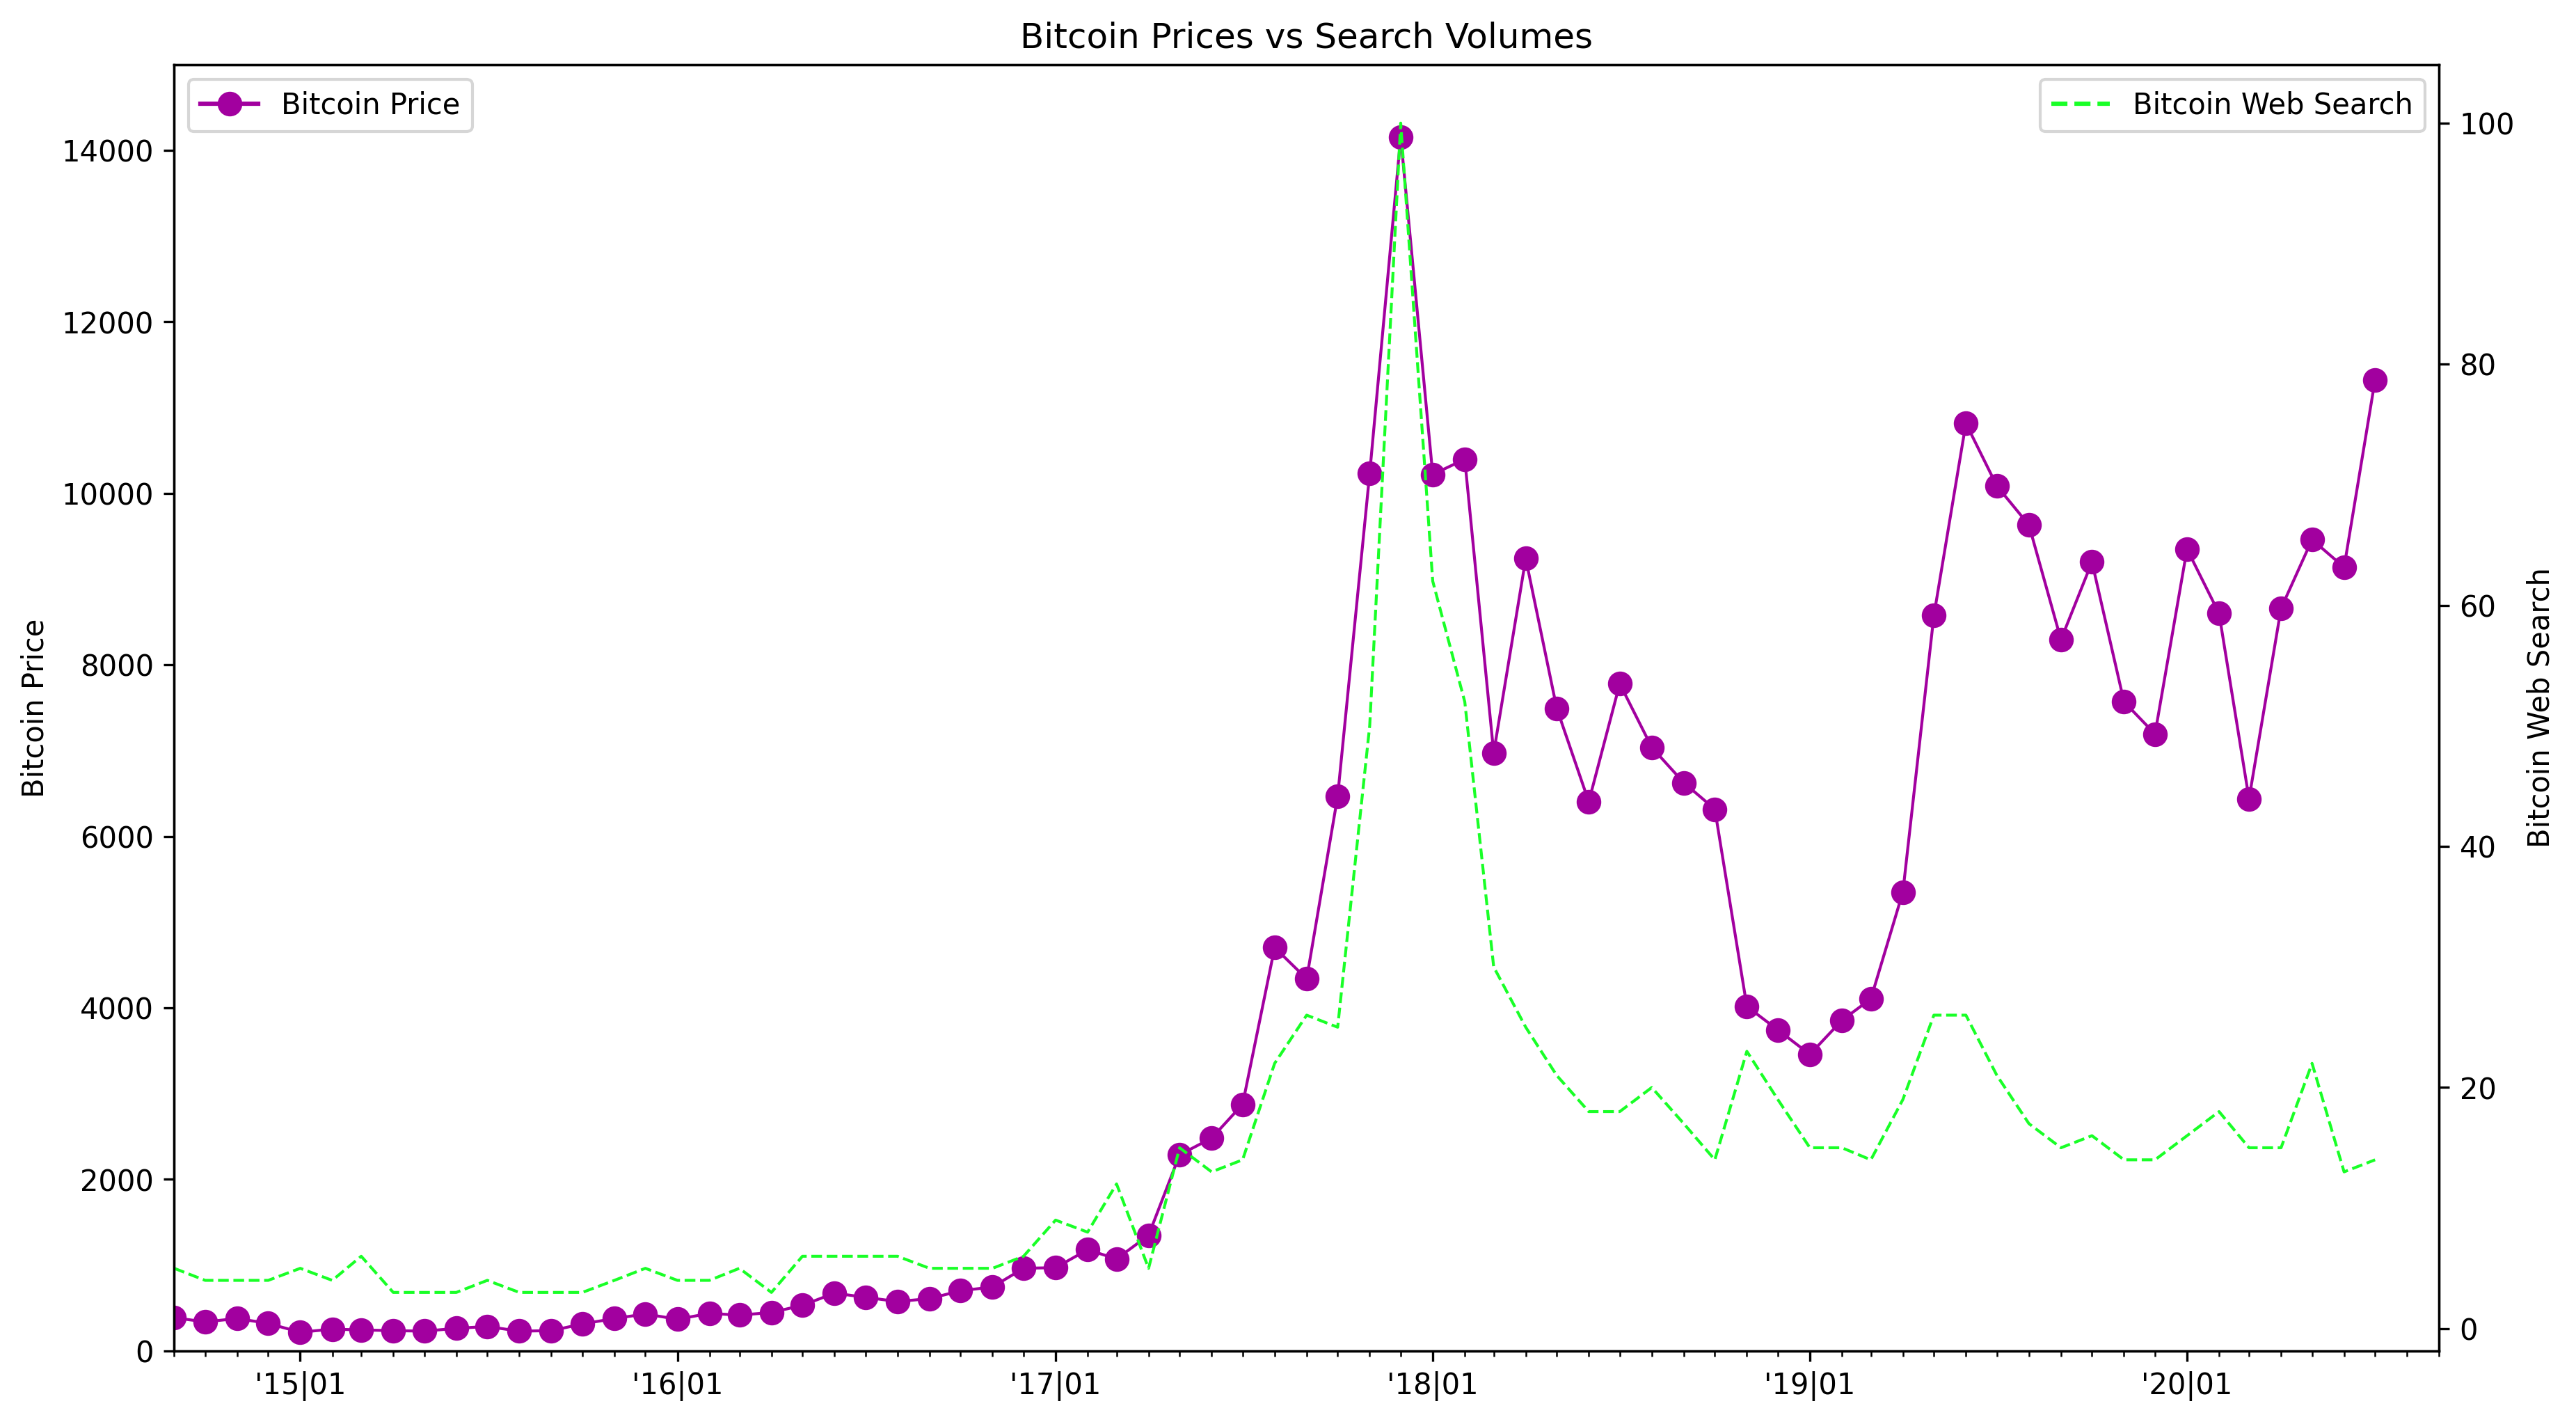

In [475]:
# give the plot more dpi
plt.figure(figsize=(14,8), dpi=300)
ax1 = plt.gca() # get the current axis object
ax1.set_title('Bitcoin Prices vs Search Volumes') # set a title for the plot
ax2 = ax1.twinx()
ax1.set_ylabel('Bitcoin Price')
ax2.set_ylabel('Bitcoin Web Search')
# rotate by 45 degrees the dates
# ax1.tick_params(axis='x', rotation=45)
ax1.plot(df_btc_price_monthly[:-2].index, df_btc_price_monthly[:-2].CLOSE, color='#A2009F', label='Bitcoin Price', linestyle="-", marker=".", markersize=15)
ax2.plot(df_btc_search[:-2].MONTH, df_btc_search[:-2].BTC_NEWS_SEARCH, color='#19FF27', label='Bitcoin Web Search', linestyle="dashed")
# set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_locator(months)
# set the y limits to 0
ax1.set_ylim(bottom=0, top=15000)
# set the x limit to the lowest date
ax2.set_xlim(left=df_btc_price_monthly.index.min(), right=df_btc_price_monthly.index.max())
# change thickness of the lines on the plot
ax1.lines[0].set_linewidth(1)
ax2.lines[0].set_linewidth(1)
# show the plot
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [476]:
type(df_unemployment.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

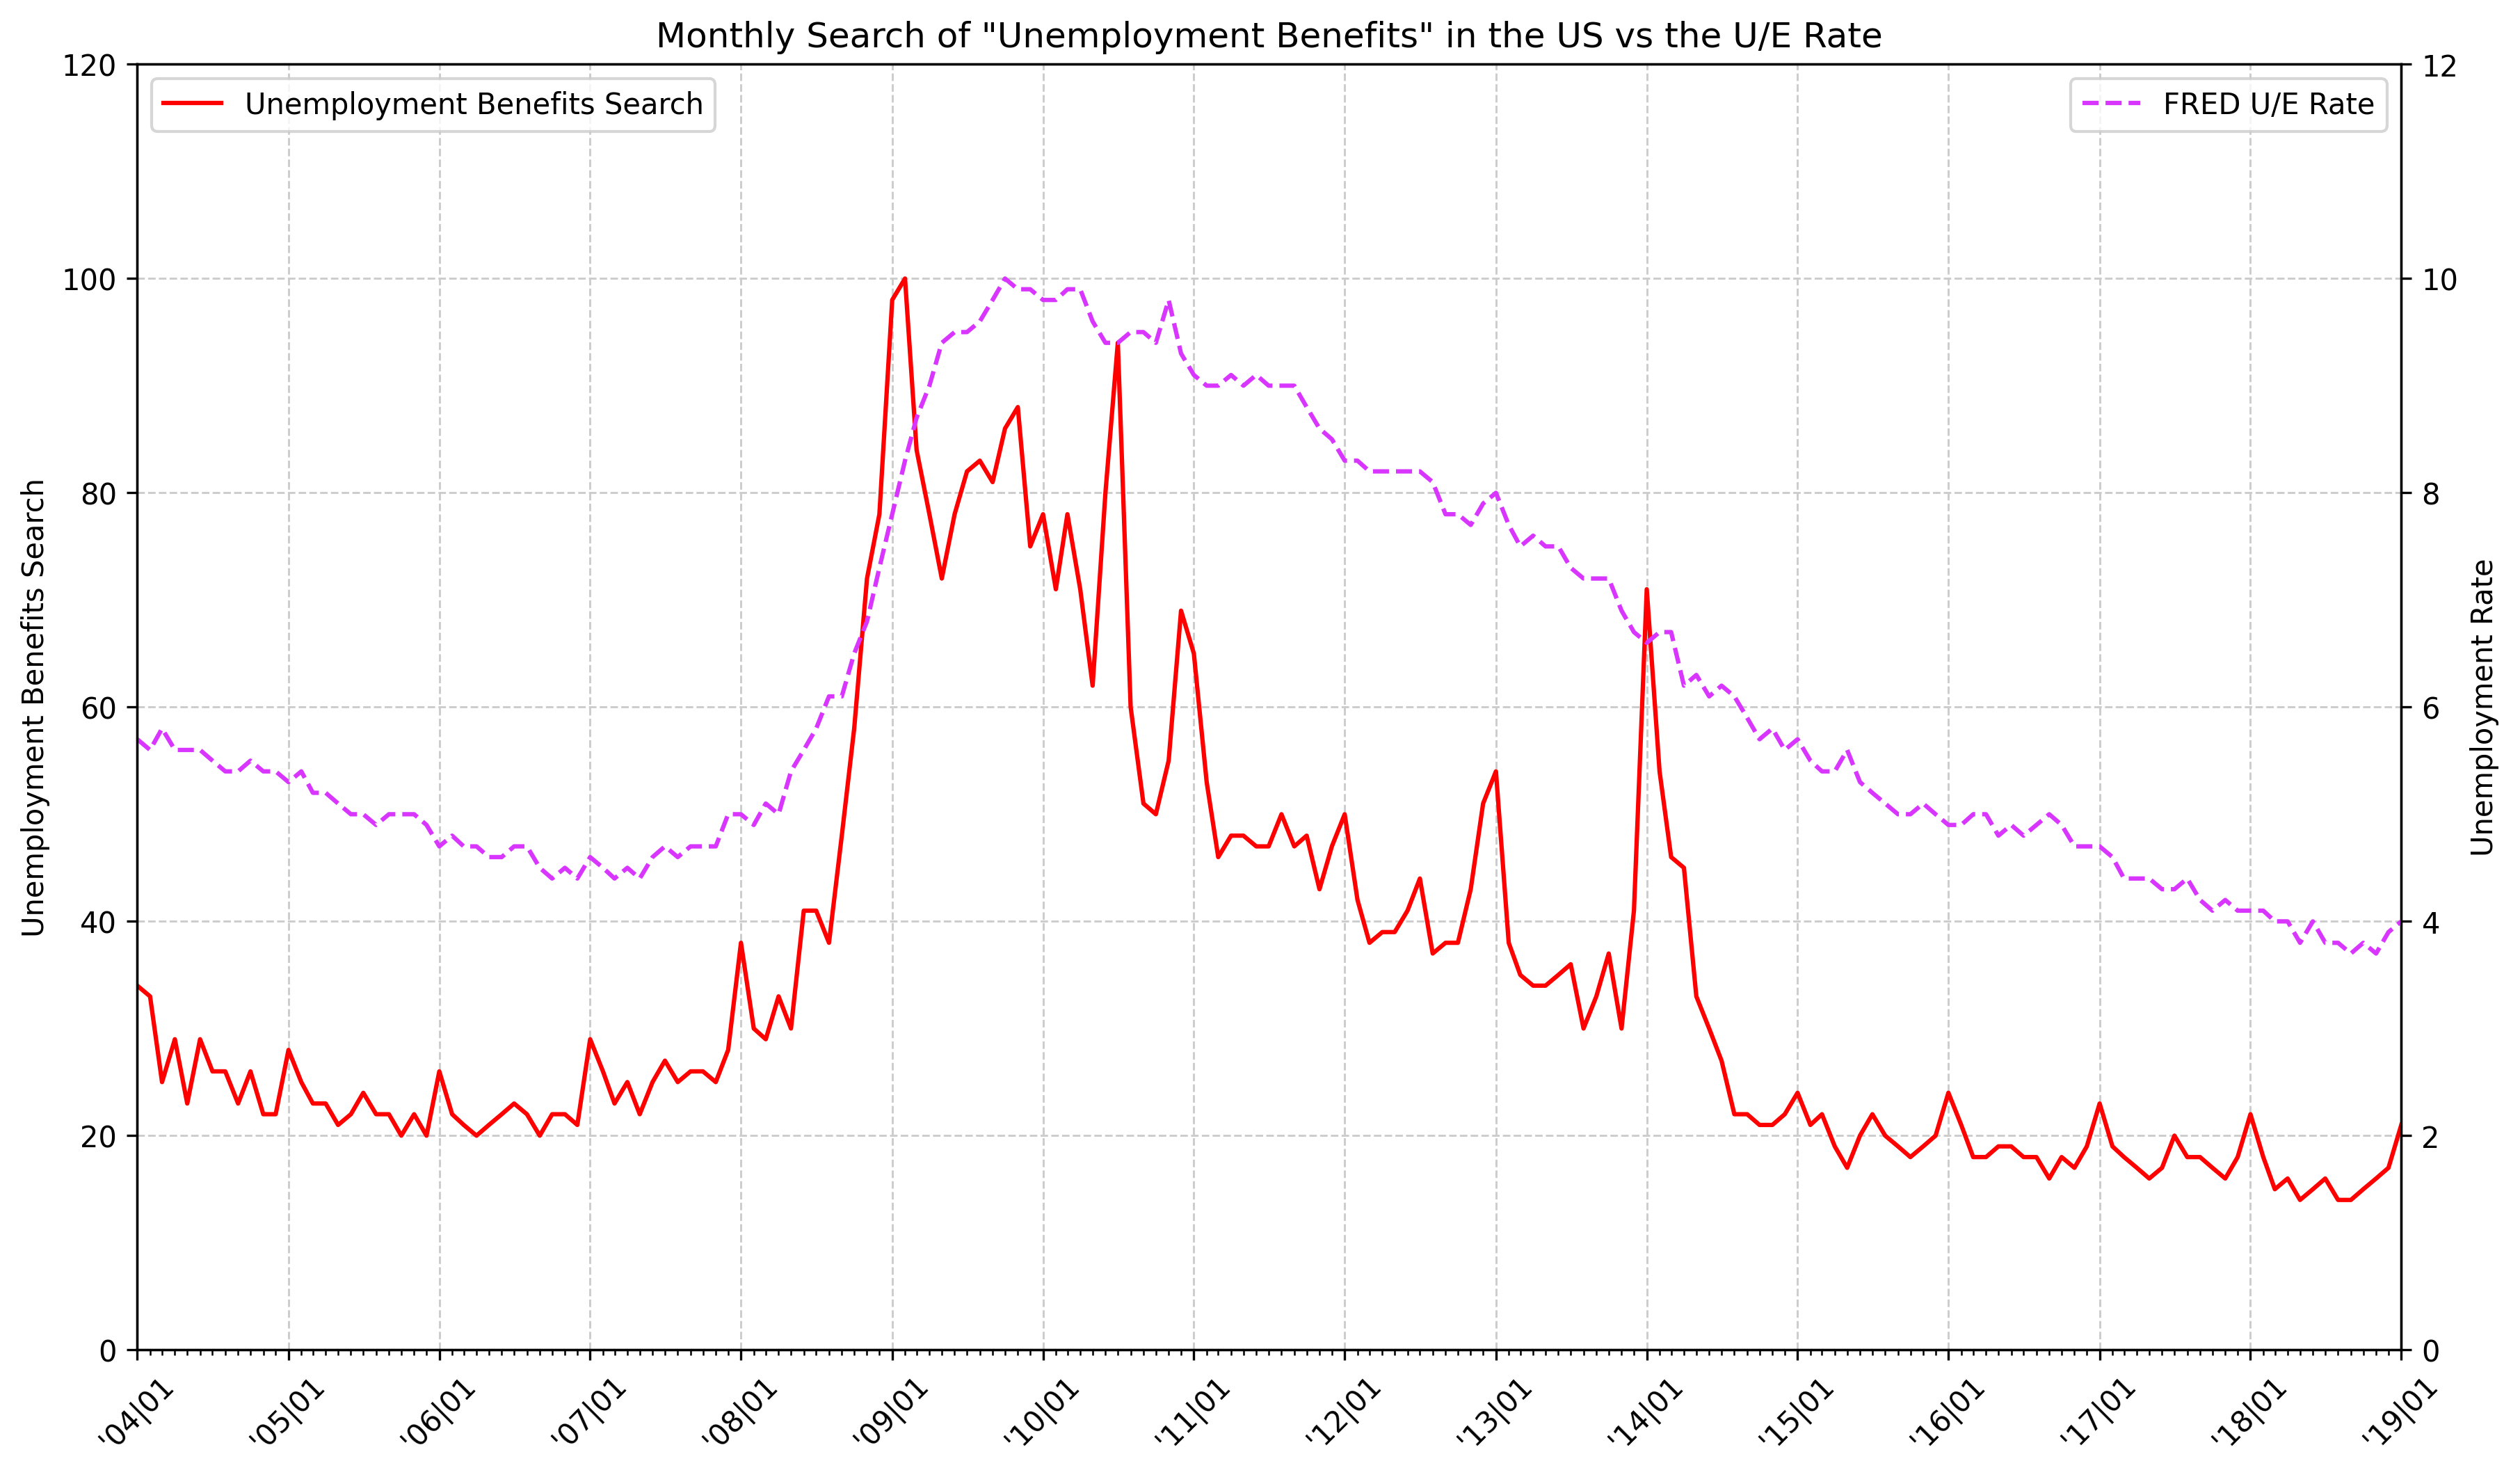

In [477]:
plt.figure(figsize=(14,8), dpi=300)
ax1 = plt.gca() # get the current axis object
ax1.set_title('Monthly Search of "Unemployment Benefits" in the US vs the U/E Rate')
ax2 = ax1.twinx()
ax1.set_ylim(bottom=0, top=120)
ax2.set_ylim(bottom=0, top=df_unemployment.UNRATE.max()+2)
ax1.set_xlim(left=df_unemployment.MONTH.min(), right=df_unemployment.MONTH.max())
# add a grey grid
ax1.grid(color='#CCCCCC', linestyle='--', linewidth=0.7)
# rotate by 45 degrees the dates
ax1.tick_params(axis='x', rotation=45)
# set the labels
ax1.set_ylabel('Unemployment Benefits Search')
ax2.set_ylabel('Unemployment Rate')
ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='#FF0000', label='Unemployment Benefits Search')
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#D835FF', label='FRED U/E Rate', linestyle='dashed')
# change the frequency of the dates on the x axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_locator(months)
# set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


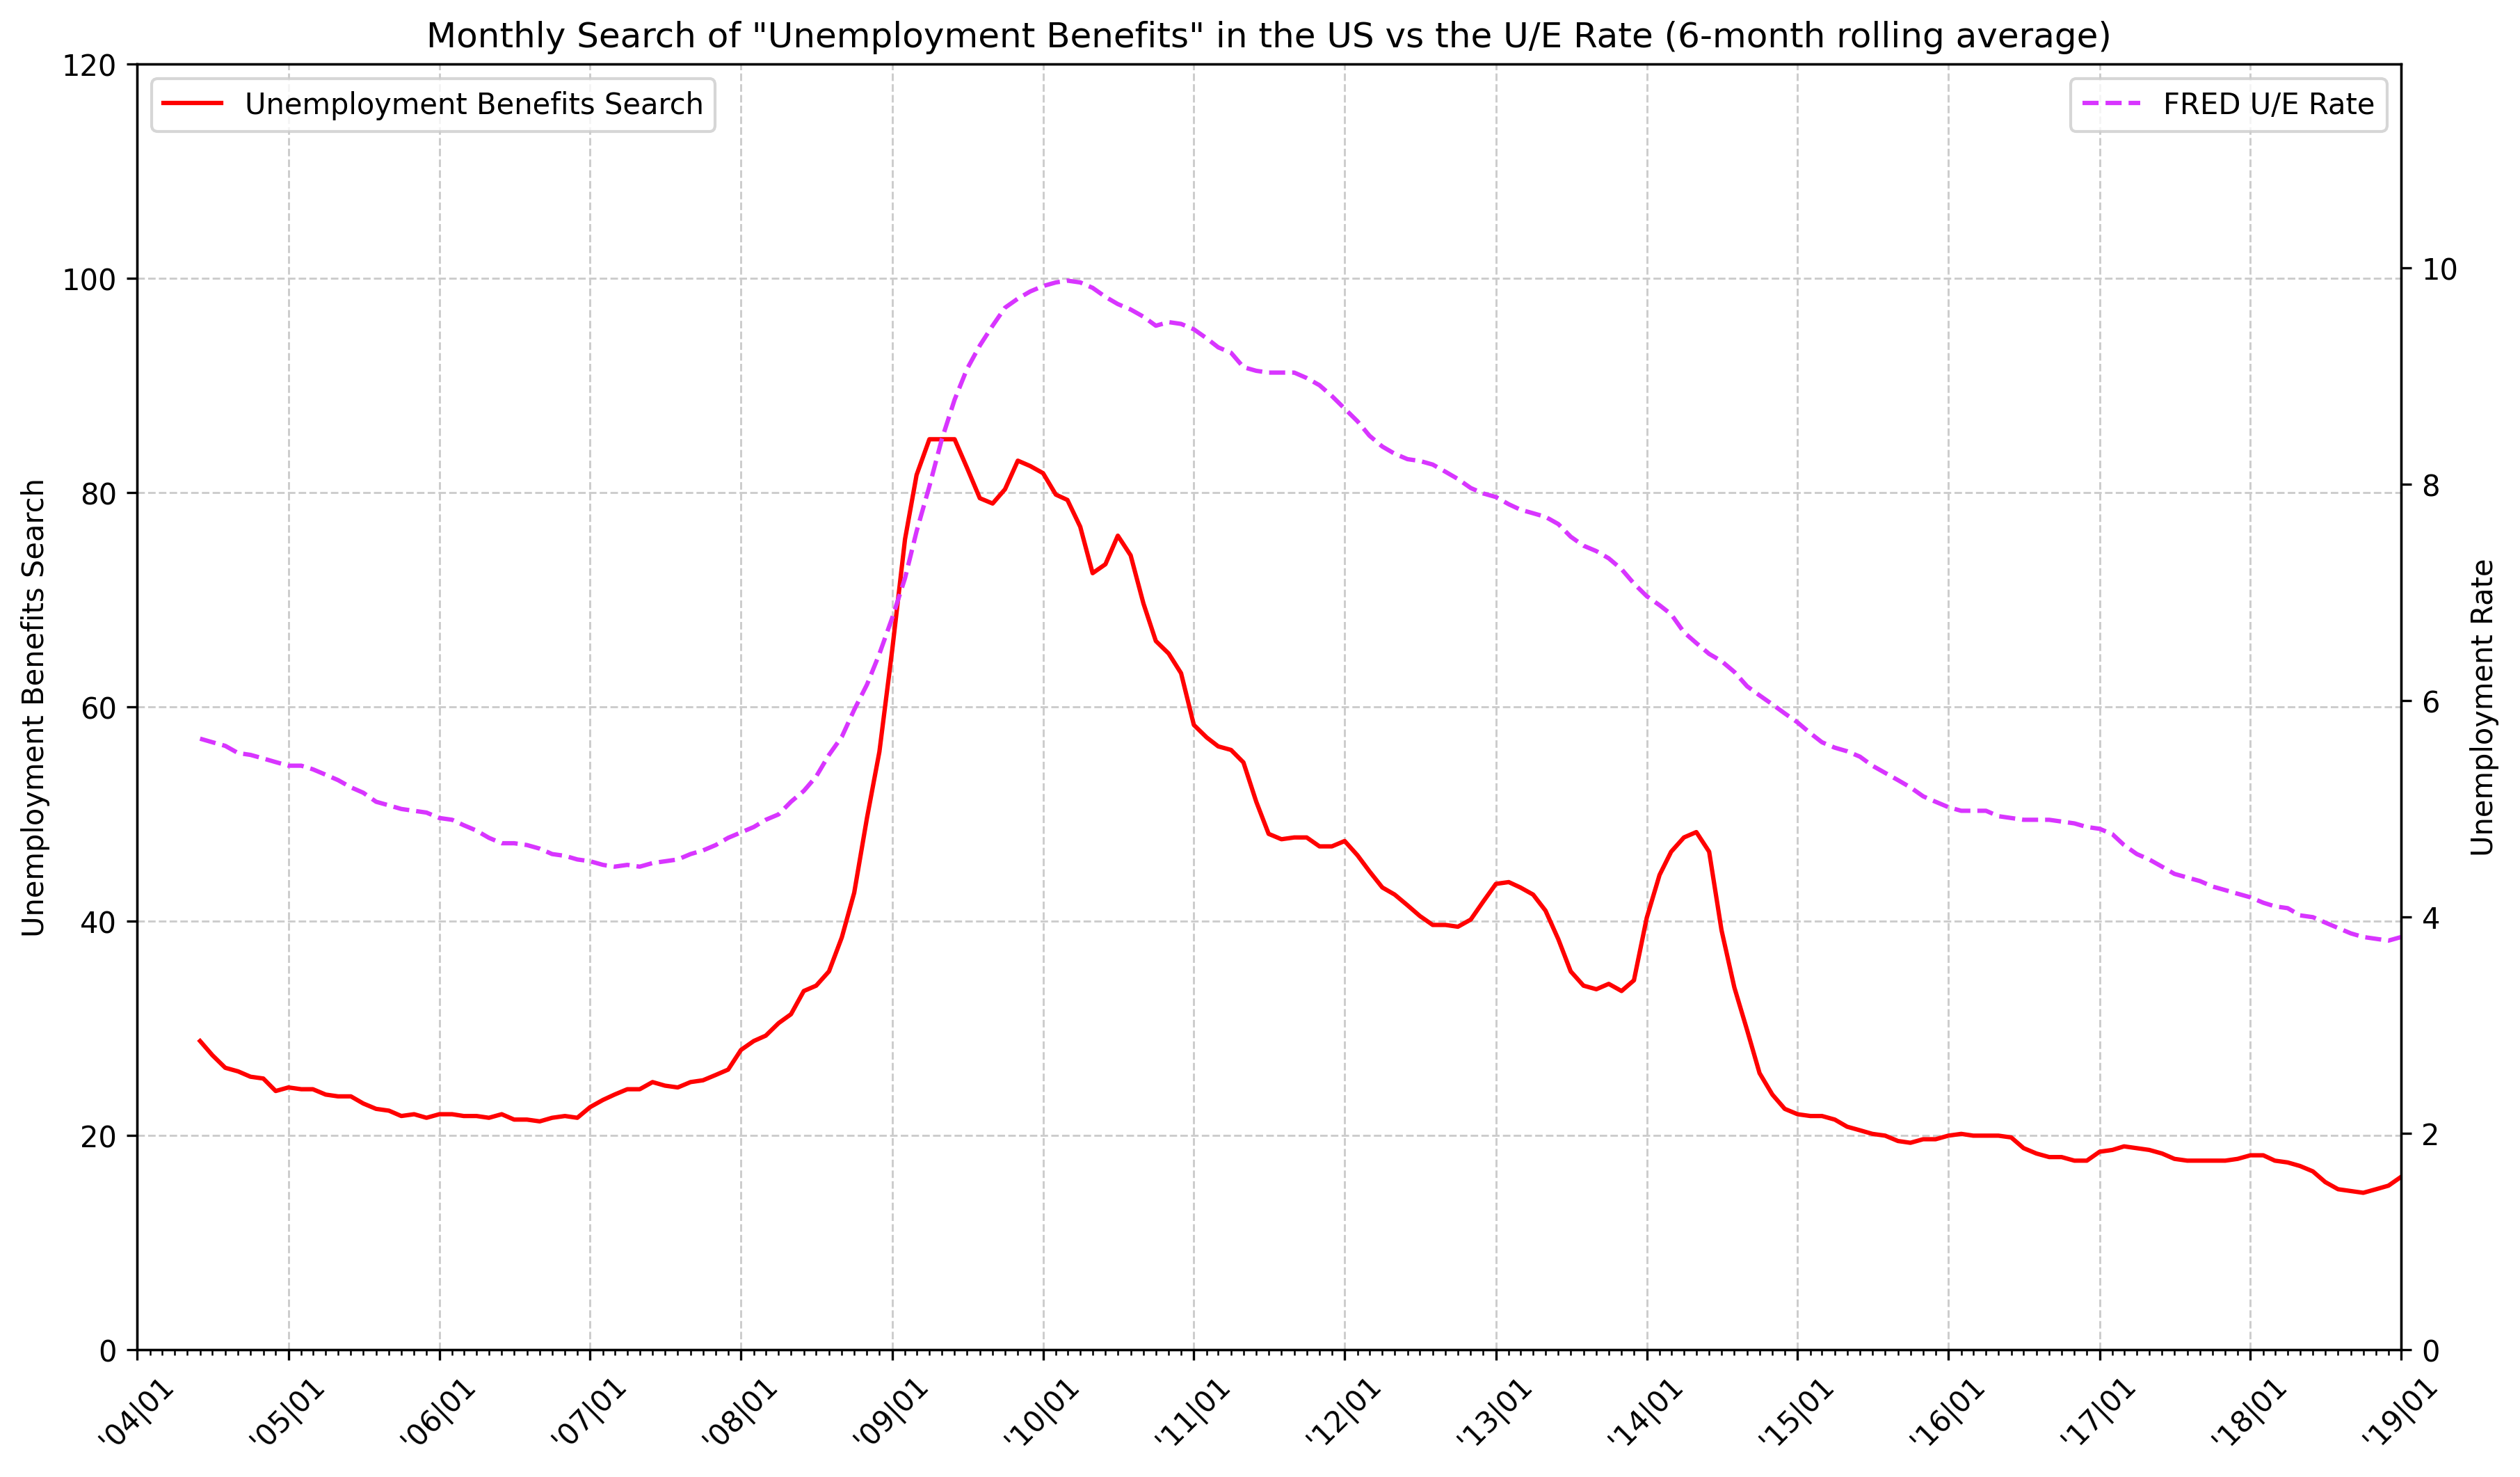

In [478]:
# Calculate the 6-month rolling average for the web searches
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()


plt.figure(figsize=(14,8), dpi=300)
ax1 = plt.gca() # get the current axis object
ax1.set_title('Monthly Search of "Unemployment Benefits" in the US vs the U/E Rate (6-month rolling average)')
ax2 = ax1.twinx()
ax1.set_ylim(bottom=0, top=120)
ax2.set_ylim(bottom=0, top=roll_df.UNRATE.max()+2)
ax1.set_xlim(left=df_unemployment.MONTH.min(), right=df_unemployment.MONTH.max())
# add a grey grid
ax1.grid(color='#CCCCCC', linestyle='--', linewidth=0.7)
# rotate by 45 degrees the dates
ax1.tick_params(axis='x', rotation=45)
# set the labels
ax1.set_ylabel('Unemployment Benefits Search')
ax2.set_ylabel('Unemployment Rate')
ax1.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='#FF0000', label='Unemployment Benefits Search')
ax2.plot(df_unemployment.MONTH, roll_df.UNRATE, color='#D835FF', label='FRED U/E Rate', linestyle='dashed')
# change the frequency of the dates on the x axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_locator(months)
# set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [479]:
df_unemployment_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_2020.MONTH = pd.to_datetime(df_unemployment_2020.MONTH)

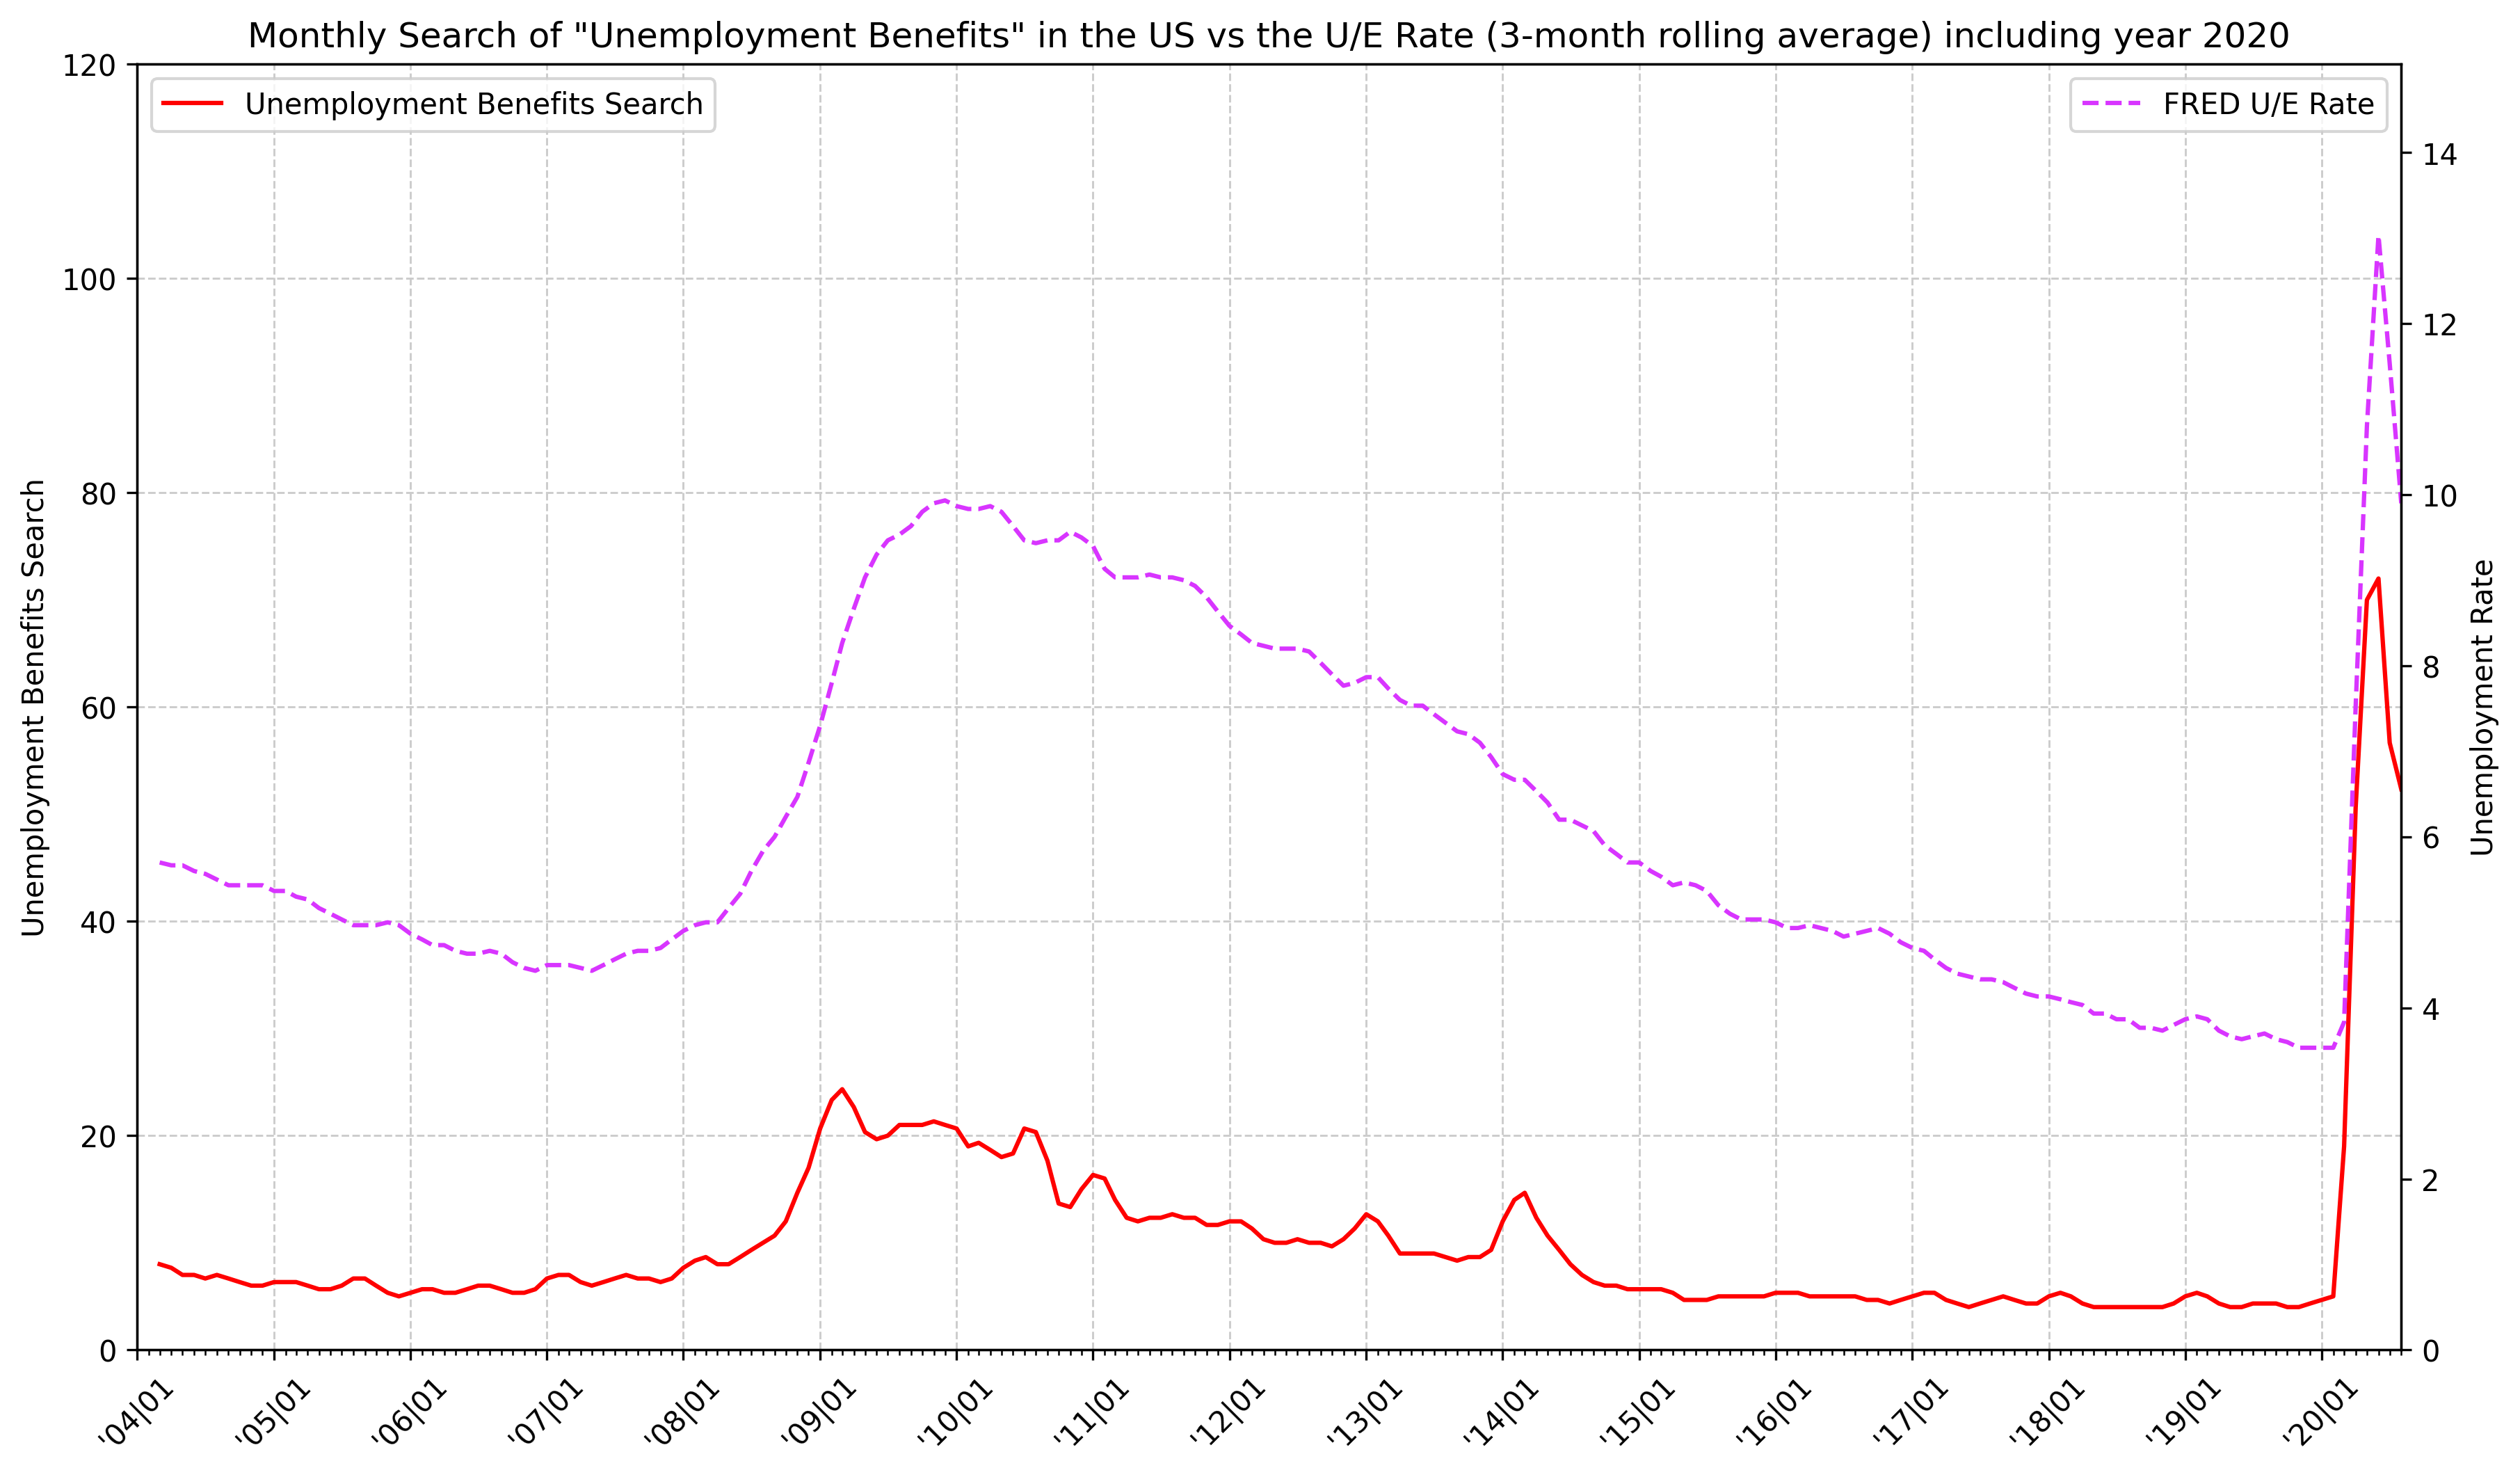

In [480]:
# Calculate the 3-month rolling average for the web searches
roll_df = df_unemployment_2020[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()


plt.figure(figsize=(14,8), dpi=300)
ax1 = plt.gca() # get the current axis object
ax1.set_title('Monthly Search of "Unemployment Benefits" in the US vs the U/E Rate (3-month rolling average) including year 2020')
ax2 = ax1.twinx()
ax1.set_ylim(bottom=0, top=120)
ax2.set_ylim(bottom=0, top=roll_df.UNRATE.max()+2)
ax1.set_xlim(left=df_unemployment_2020.MONTH.min(), right=df_unemployment_2020.MONTH.max())
# add a grey grid
ax1.grid(color='#CCCCCC', linestyle='--', linewidth=0.7)
# rotate by 45 degrees the dates
ax1.tick_params(axis='x', rotation=45)
# set the labels
ax1.set_ylabel('Unemployment Benefits Search')
ax2.set_ylabel('Unemployment Rate')
ax1.plot(df_unemployment_2020.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='#FF0000', label='Unemployment Benefits Search')
ax2.plot(df_unemployment_2020.MONTH, roll_df.UNRATE, color='#D835FF', label='FRED U/E Rate', linestyle='dashed')
# change the frequency of the dates on the x axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_minor_locator(months)
# set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# TODAY WE LEARNED

### How to use .describe() to quickly see some descriptive statistics at a glance.
 
### How to use .resample() to make a time-series data comparable to another by changing the periodicity.
 
### How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).
 
### How to find the number of NaN values with .isna().values.sum()
 
### How to change the resolution of a chart using the figure's dpi
 
### How to create dashed '--' and dotted '-.' lines using linestyles
 
### How to use different kinds of markers (e.g., 'o' or '^') on charts.

### Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

### Using .grid() to help visually identify seasonality in a time series.